# **AIN 214 - PA3 - FALL 2024**




**Student Number** : 2220765007

**Name Surname**   : Furkan Necati İnan


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 29.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Data Prepocessing and Regression**

---
**Dataset Path:** "Data/insurance.csv"
---

We will deal with the insurance dataset. This dataset contains data on individual medical insurance costs based on several demographic and personal health factors.

**Features:**


* Age: Age of the individual
* Sex: Gender of the individual
* BMI: Body Mass Index, a measure of body fat based on height and weight
* Children: Number of children/dependents
* Smoker: Whether the individual smokes or not
* Region: Geographical region in the US
* Charges: Medical expenses (target variable for regression)

# **Necessary Imports**

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# **PART- 1: Data Preprocessing (50 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [145]:
data = pd.read_csv('Data/insurance.csv')
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


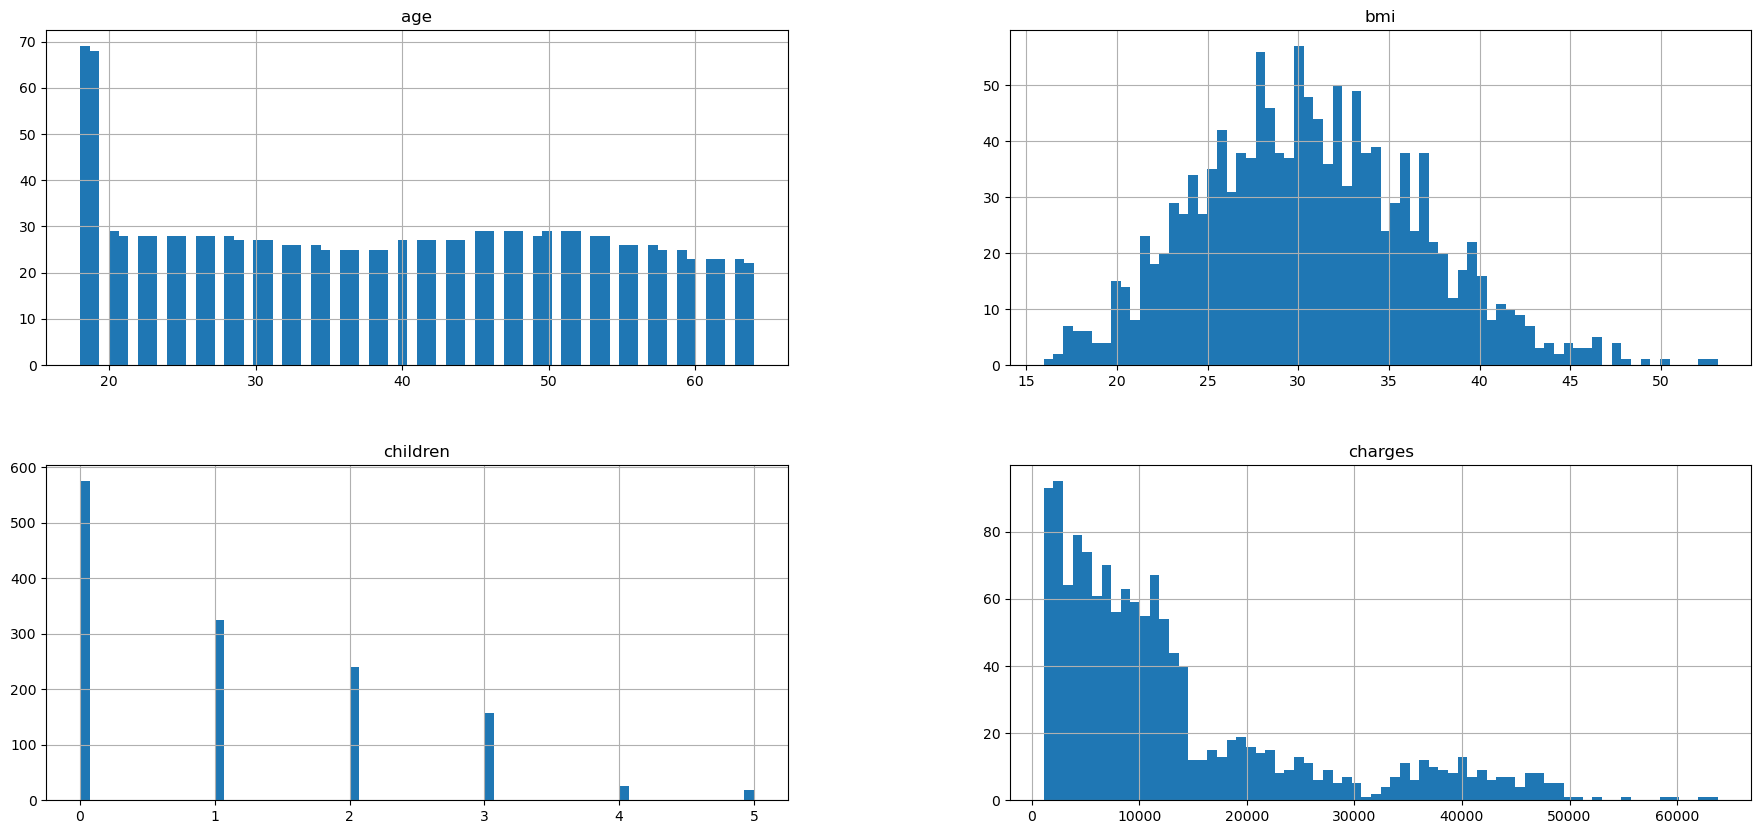

In [147]:
data.hist(bins=70, figsize=(22, 10))
plt.show()

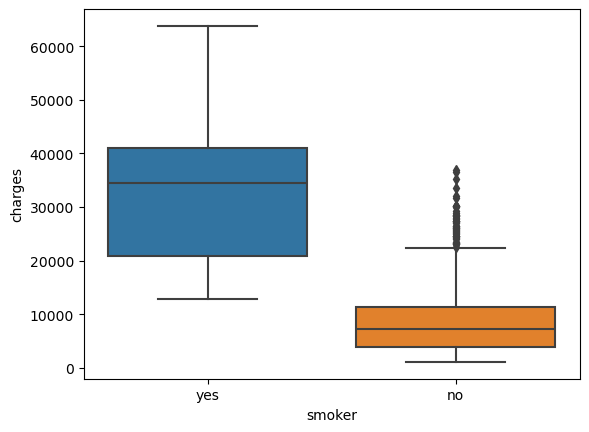

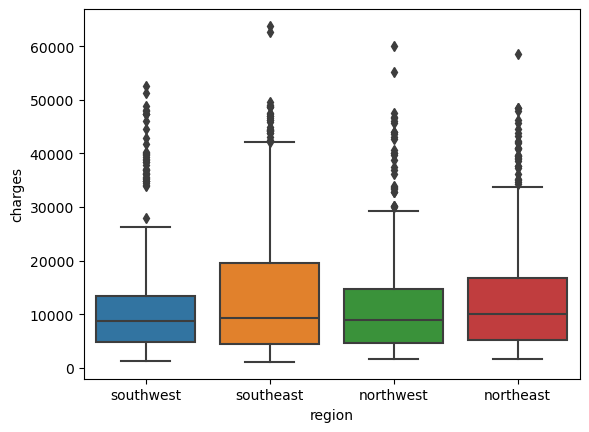

In [148]:
sns.boxplot(x='smoker', y='charges', data=data)
plt.show()

sns.boxplot(x='region', y='charges', data=data)
plt.show()

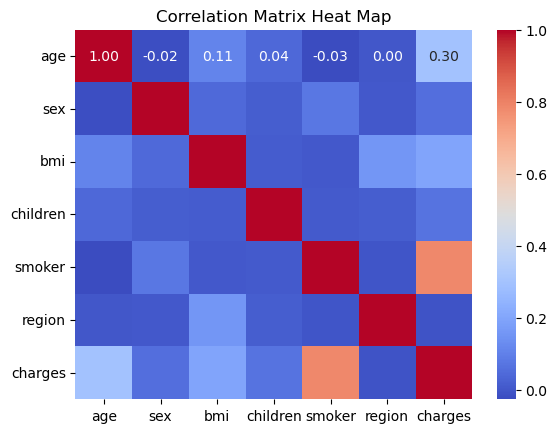

In [149]:
# Sex: male -> 1, female -> 0
data['sex'] = data['sex'].map({'male': 1, 'female': 0})

# Smokers: yes -> 1, no -> 0
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Region: NE -> 0, NW -> 1, SE -> 3, SW -> 4
data['region'] = data['region'].map({
    'northeast': 0, 
    'northwest': 1, 
    'southeast': 2, 
    'southwest': 3
})

numeric_data = data.select_dtypes(include=[np.number])


correlation_matrix = numeric_data.corr()  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  
plt.title('Correlation Matrix Heat Map')
plt.show()


In [150]:
"""
1- The dataset has no missing entries, ensuring clean data for analysis.
2- The charges are right-skewed, indicating most individuals have lower medical costs, with a few incurring very high expenses.
BMI follows a normal distribution, peaking around 25-30.
Most individuals have 0 or 1 child.
The age distribution is fairly uniform across the range with a noticeable peak in younger ages.
3- Smokers incur significantly higher medical charges compared to non-smokers.
4- There is a mild positive correlation (0.30) between age and charges, indicating that olders tend to 
have slightly higher costs.
5- BMI shows a weak correlation (0.19) with charges.
6- The strongest correlation is between being a smoker and charges, reflecting that smoking greatly impacts medical expenses.
7- The number of children and region show almost no correlation with charges.
"""

'\n1- The dataset has no missing entries, ensuring clean data for analysis.\n2- The charges are right-skewed, indicating most individuals have lower medical costs, with a few incurring very high expenses.\nBMI follows a normal distribution, peaking around 25-30.\nMost individuals have 0 or 1 child.\nThe age distribution is fairly uniform across the range with a noticeable peak in younger ages.\n3- Smokers incur significantly higher medical charges compared to non-smokers.\n4- There is a mild positive correlation (0.30) between age and charges, indicating that olders tend to \nhave slightly higher costs.\n5- BMI shows a weak correlation (0.19) with charges.\n6- The strongest correlation is between being a smoker and charges, reflecting that smoking greatly impacts medical expenses.\n7- The number of children and region show almost no correlation with charges.\n'

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [152]:
# your code here
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print(outliers.sum())

age           0
sex           0
bmi           9
children      0
smoker      274
region        0
charges     139
dtype: int64


In [154]:
"""
IQR measures the spread of the middle 50% of a dataset. Calculations: 

IQR = Q3 - Q1

Q1 (First Quartile): The 25th percentile (lower quartile).
Q3 (Third Quartile): The 75th percentile (upper quartile).

IQR helps identify outliers; values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.

The Interquartile Range IQR method is chosen for outlier detection because it is simple, effective, and 
resistant to extreme values. ıQR measures the spread of the middle 50% of the data, making it less sensitive to outliers.
This makes it a reliable choice, especially for datasets with non-normal distributions.
"""

'\nIQR measures the spread of the middle 50% of a dataset. Calculations: \n\nIQR = Q3 - Q1\n\nQ1 (First Quartile): The 25th percentile (lower quartile).\nQ3 (Third Quartile): The 75th percentile (upper quartile).\n\nIQR helps identify outliers; values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.\n\nThe Interquartile Range IQR method is chosen for outlier detection because it is simple, effective, and \nresistant to extreme values. ıQR measures the spread of the middle 50% of the data, making it less sensitive to outliers.\nThis makes it a reliable choice, especially for datasets with non-normal distributions.\n'

## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

In [161]:
# your code here
data_baseline = data.copy()
data_outlier_removed = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_mean_imputed = data.fillna(data.mean())
data_median_imputed = data.fillna(data.median())


## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [164]:
# your code here
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ['sex', 'smoker', 'region']
encoder = OrdinalEncoder()
data[ordinal_features] = encoder.fit_transform(data[ordinal_features])


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split. (8 Pts)

* ***You  cannot use scikit-learn's shuffle.***

In [167]:
# your code here

data = data.sample(frac=1, random_state=42).reset_index(drop=True)  
split_index = int(0.7 * len(data))
train_data = data[:split_index]
test_data = data[split_index:]


# **PART- 2: REGRESSION (50 Pts)**
* Target value: charges
* Predictors: The rest

* ***You can use scikit-learn***




## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data.
    * Predict the test set and calculate the MSE value for each k.
    * Plot the MSE vs k curve to decide on the optimal k.
    * Report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?


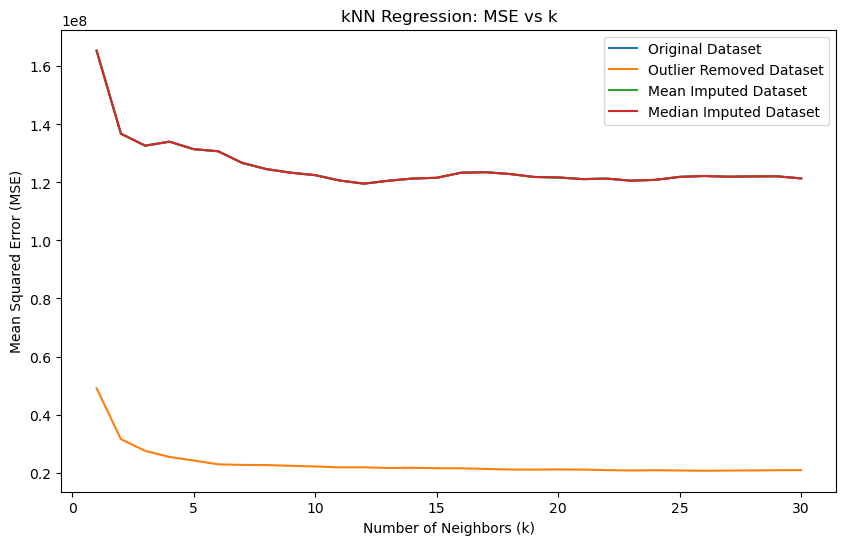

           Dataset  Optimal k           MSE        R²
0         Original         12  1.195795e+08  0.148244
1  Outlier Removed         26  2.064362e+07  0.407396
2     Mean Imputed         12  1.195795e+08  0.148244
3   Median Imputed         12  1.195795e+08  0.148244
Dataset: Original
  Optimal k: 12
  Minimum MSE: 119579533.40
  R-squared for optimal k: 0.15

Dataset: Outlier Removed
  Optimal k: 26
  Minimum MSE: 20643620.40
  R-squared for optimal k: 0.41

Dataset: Mean Imputed
  Optimal k: 12
  Minimum MSE: 119579533.40
  R-squared for optimal k: 0.15

Dataset: Median Imputed
  Optimal k: 12
  Minimum MSE: 119579533.40
  R-squared for optimal k: 0.15



In [171]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

def knn_regression_analysis(data_versions, target_column='charges'):
    results = []
    mse_dict = {}  
    for version_name, dataset in data_versions.items():
      
        dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
        split_index = int(0.7 * len(dataset))
        X = dataset.drop(target_column, axis=1)
        y = dataset[target_column]
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]

        mse_values = []
        for k in range(1, 31):
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            mse_values.append(mse)

        mse_dict[version_name] = mse_values  

        optimal_k = mse_values.index(min(mse_values)) + 1
        knn = KNeighborsRegressor(n_neighbors=optimal_k)
        knn.fit(X_train, y_train)
        y_pred_optimal = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred_optimal)

 
        results.append({
            "Dataset": version_name,
            "Optimal k": optimal_k,
            "MSE": min(mse_values),
            "R²": r2
        })


    plt.figure(figsize=(10, 6))
    for version_name, mse_values in mse_dict.items():
        plt.plot(range(1, 31), mse_values, label=f'{version_name} Dataset')

    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('kNN Regression: MSE vs k')
    plt.legend()
    plt.show()

 
    return pd.DataFrame(results)


data_versions = {
    "Original": data_baseline.copy(),
    "Outlier Removed": data_outlier_removed.copy(),
    "Mean Imputed": data_mean_imputed.copy(),
    "Median Imputed": data_median_imputed.copy()
}

knn_results = knn_regression_analysis(data_versions)
print(knn_results)

for index, row in knn_results.iterrows():
    print(f"Dataset: {row['Dataset']}")
    print(f"  Optimal k: {row['Optimal k']}")
    print(f"  Minimum MSE: {row['MSE']:.2f}")
    print(f"  R-squared for optimal k: {row['R²']:.2f}\n")


## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following steps:
    * Split the data into train and test sets
    * Fit a linear regression model to train data.
    * Predict the test set and calculate the MSE value.

In [174]:
from sklearn.linear_model import LinearRegression

def linear_regression_analysis(data_versions, target_column='charges'):
    results = []
    for version_name, dataset in data_versions.items():

        X = dataset.drop(target_column, axis=1)
        y = dataset[target_column]
        split_index = int(0.7 * len(dataset))
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Dataset": version_name,
            "MSE": mse,
            "R²": r2
        })

    return pd.DataFrame(results)


linear_results = linear_regression_analysis(data_versions)
print(linear_results)


           Dataset           MSE        R²
0         Original  4.205184e+07  0.720880
1  Outlier Removed  2.220991e+07  0.306642
2     Mean Imputed  4.205184e+07  0.720880
3   Median Imputed  4.205184e+07  0.720880


## 2.3. Compare the Regression Methods (10 Pts)

* Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.).

* Discuss the strengths and limitations of each model based on your results

In [177]:
def compare_methods(knn_results, linear_results):

    comparison = knn_results.rename(columns={"MSE": "kNN MSE", "R²": "kNN R²"}).merge(
        linear_results.rename(columns={"MSE": "Linear MSE", "R²": "Linear R²"}),
        on="Dataset"
    )
    print(comparison)

    # Analysis
    for index, row in comparison.iterrows():
        print(f"Dataset: {row['Dataset']}")
        print(f"  kNN - Optimal k: {row['Optimal k']}, MSE: {row['kNN MSE']:.2f}, R²: {row['kNN R²']:.2f}")
        print(f"  Linear - MSE: {row['Linear MSE']:.2f}, R²: {row['Linear R²']:.2f}")
        print("")

compare_methods(knn_results, linear_results)


           Dataset  Optimal k       kNN MSE    kNN R²    Linear MSE  Linear R²
0         Original         12  1.195795e+08  0.148244  4.205184e+07   0.720880
1  Outlier Removed         26  2.064362e+07  0.407396  2.220991e+07   0.306642
2     Mean Imputed         12  1.195795e+08  0.148244  4.205184e+07   0.720880
3   Median Imputed         12  1.195795e+08  0.148244  4.205184e+07   0.720880
Dataset: Original
  kNN - Optimal k: 12, MSE: 119579533.40, R²: 0.15
  Linear - MSE: 42051839.54, R²: 0.72

Dataset: Outlier Removed
  kNN - Optimal k: 26, MSE: 20643620.40, R²: 0.41
  Linear - MSE: 22209914.62, R²: 0.31

Dataset: Mean Imputed
  kNN - Optimal k: 12, MSE: 119579533.40, R²: 0.15
  Linear - MSE: 42051839.54, R²: 0.72

Dataset: Median Imputed
  kNN - Optimal k: 12, MSE: 119579533.40, R²: 0.15
  Linear - MSE: 42051839.54, R²: 0.72



In [179]:
"""
kNN Regression

Strengths:
Good for non-linear relationships, especially with cleaned datasets like "Outlier Removed".
Simple and intuitive, predicting based on nearby data points.

Limitations:
Struggled with datasets containing outliers or inconsistencies, resulting in high MSE on "Original" and imputed datasets.
Computationally slower for larger datasets and heavily dependent on the choice of k.

Linear Regression

Strengths:
Good performance on "Original" and imputed datasets, with high R^2 (~0.72).
Fast and efficient, ideal for linear relationships like the one seen here.

Limitations:
Sensitive to outliers; performance dropped when outliers were removed, as they carried key information.
Assumes all relationships are linear, which limits flexibility.
"""

'\nkNN Regression\n\nStrengths:\nGood for non-linear relationships, especially with cleaned datasets like "Outlier Removed".\nSimple and intuitive, predicting based on nearby data points.\n\nLimitations:\nStruggled with datasets containing outliers or inconsistencies, resulting in high MSE on "Original" and imputed datasets.\nComputationally slower for larger datasets and heavily dependent on the choice of k.\n\nLinear Regression\n\nStrengths:\nGood performance on "Original" and imputed datasets, with high R^2 (~0.72).\nFast and efficient, ideal for linear relationships like the one seen here.\n\nLimitations:\nSensitive to outliers; performance dropped when outliers were removed, as they carried key information.\nAssumes all relationships are linear, which limits flexibility.\n'

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw3.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.